In [50]:
# acquire/wrangling
import numpy as np
import pandas as pd

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
import statsmodels.api as sm
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from pydataset import data
data('swiss')

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6
Porrentruy,76.1,35.3,9,7,90.57,26.6
Broye,83.8,70.2,16,7,92.85,23.6
Glane,92.4,67.8,14,8,97.16,24.9
Gruyere,82.4,53.3,12,7,97.67,21.0
Sarine,82.9,45.2,16,13,91.38,24.4


In [34]:
data('swiss', show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [35]:
df = data('swiss')

In [36]:
df.shape

(47, 6)

In [37]:
df.columns

Index(['Fertility', 'Agriculture', 'Examination', 'Education', 'Catholic',
       'Infant.Mortality'],
      dtype='object')

In [38]:
df = df.rename(str.lower, axis='columns')

In [42]:
df = df.rename(index=str, columns={"infant.mortality": "infant_mortality"})

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
fertility           47 non-null float64
agriculture         47 non-null float64
examination         47 non-null int64
education           47 non-null int64
catholic            47 non-null float64
infant_mortality    47 non-null float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


In [44]:
df.head()

,fertility,agriculture,examination,education,catholic,infant_mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [47]:
df.describe()

,fertility,agriculture,examination,education,catholic,infant_mortality
count,47.000000,47.000000,47.000000,47.000000,47.00000,47.000000
mean,70.142553,50.659574,16.489362,10.978723,41.14383,19.942553
std,12.491697,22.711218,7.977883,9.615407,41.70485,2.912697
min,35.000000,1.200000,3.000000,1.000000,2.15000,10.800000
25%,64.700000,35.900000,12.000000,6.000000,5.19500,18.150000
50%,70.400000,54.100000,16.000000,8.000000,15.14000,20.000000
75%,78.450000,67.650000,22.000000,12.000000,93.12500,21.700000
max,92.500000,89.700000,37.000000,53.000000,100.00000,26.600000


In [48]:
df.columns

Index(['fertility', 'agriculture', 'examination', 'education', 'catholic',
       'infant_mortality'],
      dtype='object')

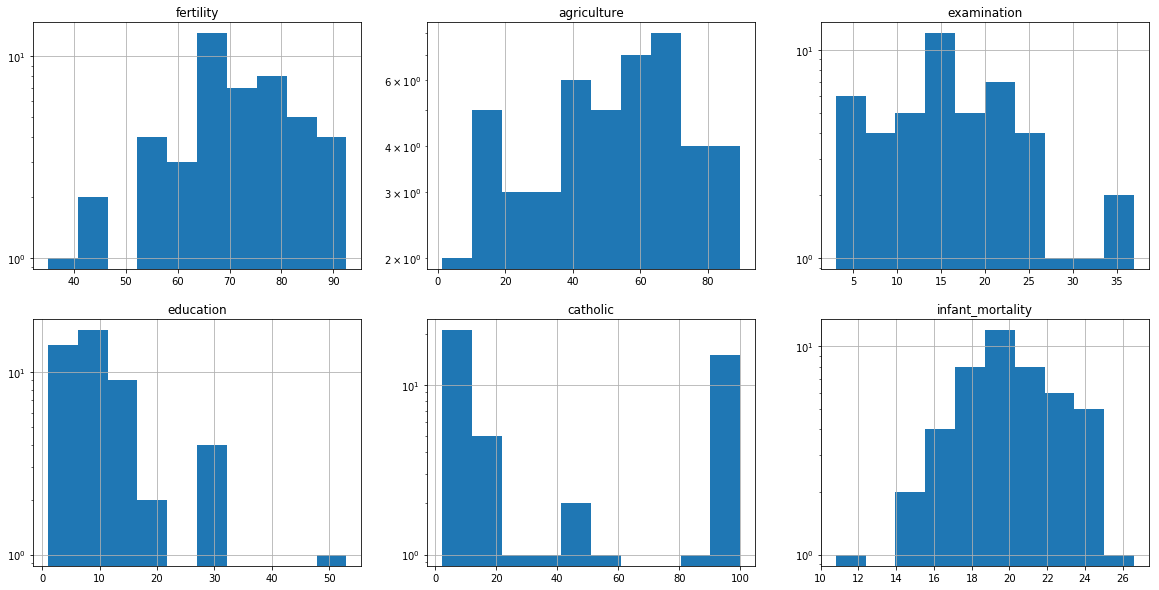

In [52]:
plt.figure(figsize=(20,10))
for i, col in enumerate(['fertility', 'agriculture', 'examination', 'education', 'catholic',
       'infant_mortality']):
    plot_number = i + 1
    series = df[col]
    plt.subplot(2, 3, plot_number)
    plt.title(col)
    series.hist(bins=10, density=False, cumulative=False, log=True)

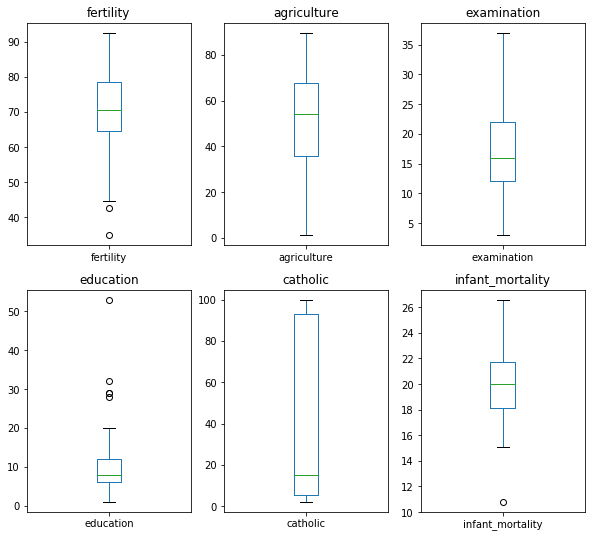

In [57]:
plt.figure(figsize=(10,9))
for i, col in enumerate(['fertility', 'agriculture', 'examination', 'education', 'catholic',
       'infant_mortality']):
    plot_number = i + 1
    series = df[col]
    plt.subplot(2, 3, plot_number)
    plt.title(col)
    series.plot.box() #logy=True

In [58]:
X = df.drop(['fertility'], axis=1)
y = df[['fertility']]

print(X.head())
print(y.head())

              agriculture        ...         infant_mortality
Courtelary           17.0        ...                     22.2
Delemont             45.1        ...                     22.2
Franches-Mnt         39.7        ...                     20.2
Moutier              36.5        ...                     20.3
Neuveville           43.5        ...                     20.6

[5 rows x 5 columns]
              fertility
Courtelary         80.2
Delemont           83.1
Franches-Mnt       92.5
Moutier            85.8
Neuveville         76.9


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.70, random_state=123)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

train = pd.concat([X_train, y_train], axis=1)
print("Train columns:  %s" % list(train.columns))
print("Train dimensions (rows, columns):", train.shape)
print('\n')

test = pd.concat([X_test, y_test], axis=1)
print("Test columns:  %s" % list(test.columns))
print("Test dimensions (rows, columns):", test.shape)

Train columns:  ['agriculture', 'examination', 'education', 'catholic', 'infant_mortality', 'fertility']
Train dimensions (rows, columns): (32, 6)


Test columns:  ['agriculture', 'examination', 'education', 'catholic', 'infant_mortality', 'fertility']
Test dimensions (rows, columns): (15, 6)


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [60]:
if X_train.shape[0] == y_train.shape[0]:
    print('X & y train rows ARE INDEED equal')
else:
    print('X & y train rows are NOT equal')

if X_test.shape[0] == y_test.shape[0]:
    print('X & y test rows ARE INDEED equal')
else:
    print('X & y test rows are NOT equal')

if train.shape[1] == test.shape[1]:
    print('Number of columns in train & test ARE INDEED equal')
else:
    print('Number of columns in train & test are NOT equal')


train_split = train.shape[0] / (train.shape[0] + test.shape[0])
test_split = test.shape[0] / (train.shape[0] + test.shape[0])

print('Train Split: %.2f' % train_split)
print('Test Split: %.2f' % test_split)

X & y train rows ARE INDEED equal
X & y test rows ARE INDEED equal
Number of columns in train & test ARE INDEED equal
Train Split: 0.68
Test Split: 0.32


/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWa

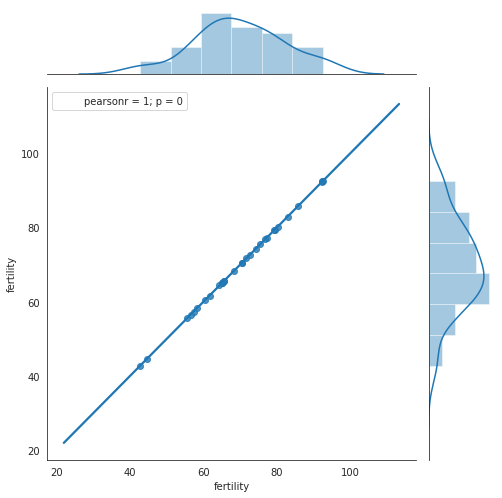

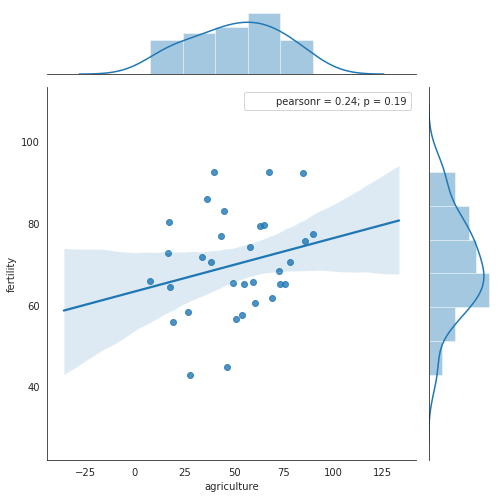

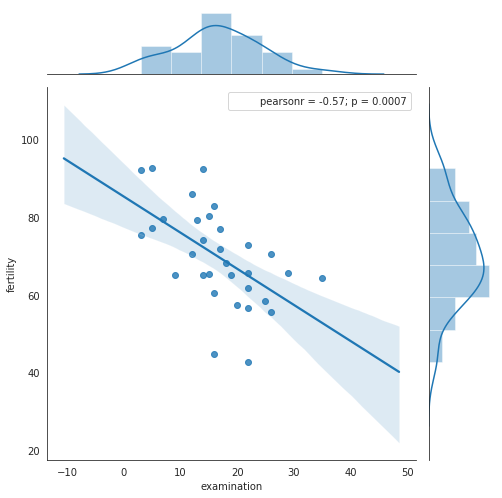

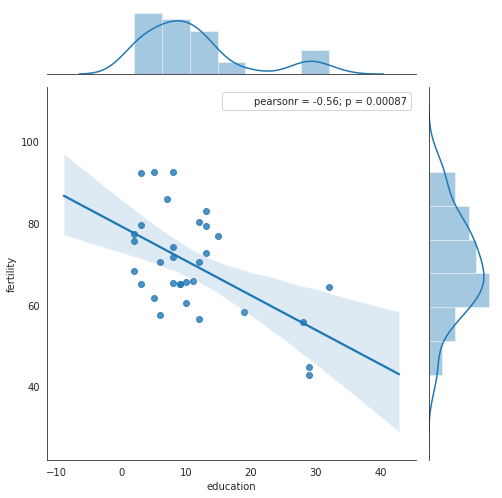

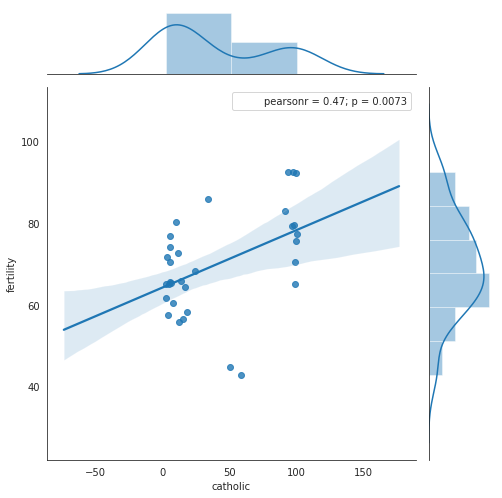

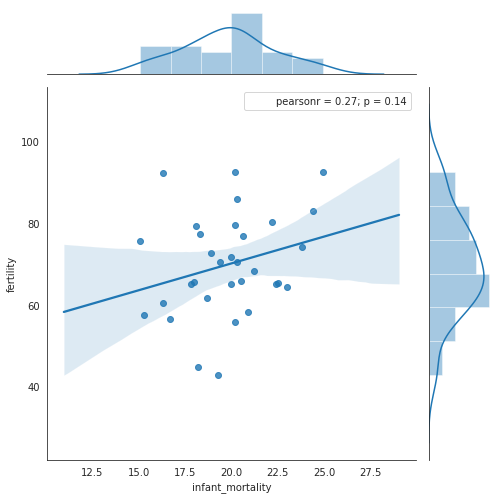

In [62]:
for i, col in enumerate(['fertility', 'agriculture', 'examination', 'education', 'catholic', 'infant_mortality']):
    with sns.axes_style('white'):
            plot_number = i + 1
#             series = df_fixed[col]
            j = sns.jointplot(train[col], 'fertility', data=train, kind='reg', height=7)
            j.annotate(stats.pearsonr)
plt.show()

<Figure size 720x360 with 0 Axes>

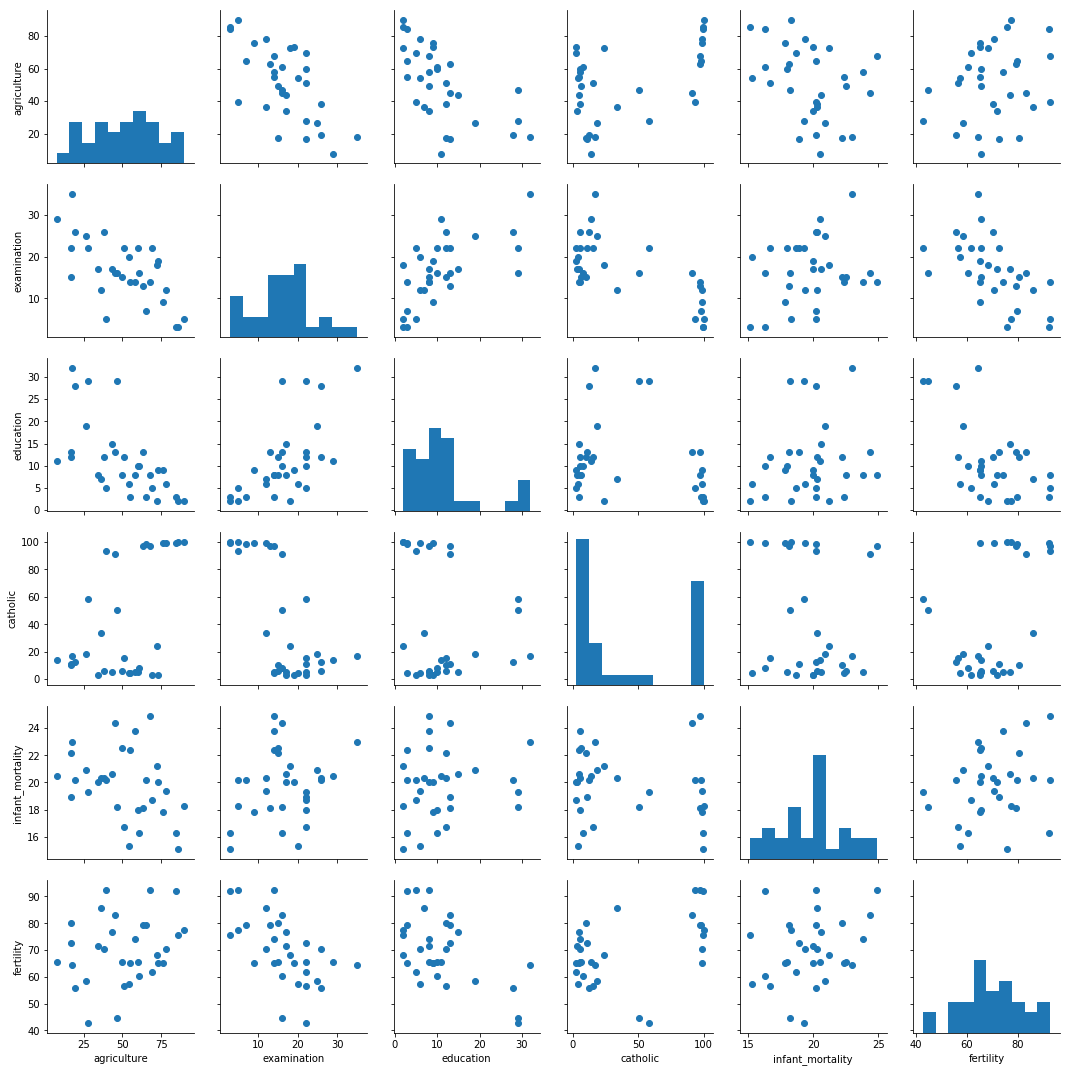

In [66]:
plt.figure(figsize=(10,5))
g = sns.PairGrid(train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

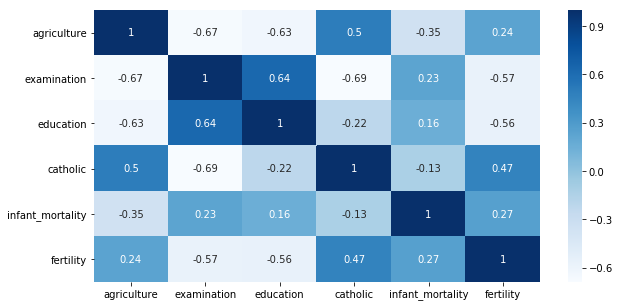

In [69]:
plt.figure(figsize=(10,5))
sns.heatmap(train.corr(), cmap='Blues', annot=True)

In [72]:
column_names = X_train.columns
r_and_p_values = [pearsonr(X_train[col], y_train.fertility) for col in column_names]

print('Pearson r and p-values')

exam_final_corr_dict = dict(zip(column_names, r_and_p_values))
exam_final_corr_dict

Pearson r and p-values


{'agriculture': (0.2373190547336189, 0.19092617184732316),
 'examination': (-0.5678520313497669, 0.0006990666269751858),
 'education': (-0.559642217271988, 0.0008675042713167025),
 'catholic': (0.46548460095069305, 0.007259251436065238),
 'infant_mortality': (0.26508624969535294, 0.14257419612741745)}

Personal note re R^2:
Need: R^2 greater than .5;  ie in one example, "92.1% of the variance in dependent variable is explained by the independent variable."

Also re Pearson's R:  "Pearson's R is __ with a significance p-value of __"


As a yardstick, REMEMBER:

R square > .5 (or "50%"),

F stat significance < 0.05

p value < 0.05

If all true, this is a good fit and THESE RESULTS ARE RELIABLE.

In [73]:
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              fertility   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     344.2
Date:                Thu, 18 Apr 2019   Prob (F-statistic):           1.48e-23
Time:                        09:39:05   Log-Likelihood:                -115.05
No. Observations:                  32   AIC:                             240.1
Df Residuals:                      27   BIC:                             247.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
agriculture          0.0151      0.092      0.164      0.871      -0.174       0.204
examination          0.0525      0.416      0.126      0.900      -0.801       0.906
education           -0.7758      0.323     -2.403      0.023      -1.438      -0.113
catholic             0.1471      0.065      2.268      0.032       0.014       0.280
infant_mortality     3.5519      0.423      8.398      0.000       2.684       4.420
==============================================================================
Omnibus:                        1.672   Durbin-Watson:                   2.522
Prob(Omnibus):                  0.433   Jarque-Bera (JB):                1.168
Skew:                           0.193   Prob(JB):                        0.558
Kurtosis:                       2.147   Cond. No.                         26.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
lm1 = LinearRegression(fit_intercept=True, normalize=False)
print(lm1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [85]:
lm1.fit(X_train[['catholic', 'agriculture']], y_train)
print(lm1)

# below creates the coefficient values for the y-intercept and the respective coefficients for each X:
lm1_y_intercept = lm1.intercept_
print(lm1_y_intercept)

lm1_coefficients = lm1.coef_
print(lm1_coefficients)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[64.1070694]
[[0.13948782 0.00273611]]


In [86]:
y_pred_lm1 = lm1.predict(X_train[['catholic', 'agriculture']])

In [87]:
mse_lm1 = mean_squared_error(y_train, y_pred_lm1)
print('lm1\n  mse: {:.3}'.format(mse_lm1))

lm1
  mse: 1.16e+02


In [90]:
r2_lm1 = r2_score(y_train, y_pred_lm1)
print('  {:.2%} of the variance of the fertility can be explained by catholic, agriculture variables'.format(r2_lm1))

  21.67% of the variance of the fertility can be explained by catholic, agriculture variables


Text(0, 0.5, 'Residuals')

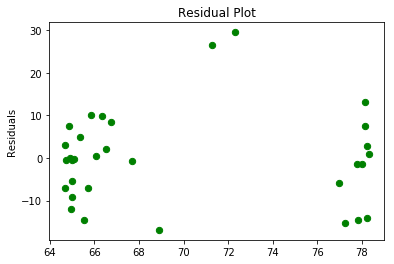

In [89]:
plt.scatter(y_pred_lm1, y_pred_lm1 - y_train, c='g', s=40)
#plt.hlines(y=0, xmin=50, xmax=100)
plt.title('Residual Plot')
plt.ylabel('Residuals')

In [83]:
lm2 = LinearRegression(fit_intercept=True, normalize=False)
print(lm2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [ ]:
#['fertility', 'agriculture', 'examination', 'education', 'catholic', 'infant_mortality']

In [91]:
lm2.fit(X_train[['education', 'examination']], y_train)
print(lm2)

# below creates the coefficient values for the y-intercept and the respective coefficients for each X:
lm2_y_intercept = lm2.intercept_
print(lm2_y_intercept)

lm2_coefficients = lm2.coef_
print(lm2_coefficients)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[85.0527116]
[[-0.50214409 -0.58179294]]


In [92]:
# This makes predictions based on the model created above.
y_pred_lm2 = lm2.predict(X_train[['education', 'examination']])

In [103]:
mse_lm2 = mean_squared_error(y_train, y_pred_lm2)
print('lm2\n  mse: {:.3}'.format(mse_lm2))

lm2
  mse: 90.6


In [94]:
r2_lm1 = r2_score(y_train, y_pred_lm2)
print('  {:.2%} of the variance of the fertility can be explained by the education, examination'.format(r2_lm1))

  38.88% of the variance of the fertility can be explained by the education, examination


Text(0, 0.5, 'Residuals')

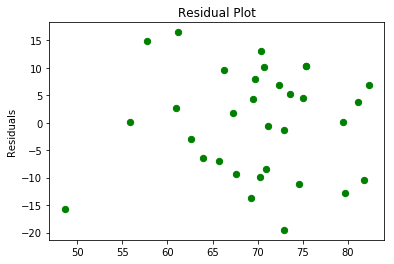

In [95]:
plt.scatter(y_pred_lm2, y_pred_lm2 - y_train, c='g', s=40)
#plt.hlines(y=0, xmin=50, xmax=100)
plt.title('Residual Plot')
plt.ylabel('Residuals')

In [96]:
lm3 = LinearRegression(fit_intercept=True, normalize=False)
print(lm3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [ ]:
#['fertility', 'agriculture', 'examination', 'education', 'catholic', 'infant_mortality']

In [98]:
lm3.fit(X_train[['education', 'catholic']], y_train)
print(lm3)

# below creates the coefficient values for the y-intercept and the respective coefficients for each X:
lm3_y_intercept = lm3.intercept_
print(lm3_y_intercept)

lm3_coefficients = lm3.coef_
print(lm3_coefficients)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[73.45812532]
[[-0.72351572  0.10843564]]


In [99]:
# This makes predictions based on the model created above.
y_pred_lm3 = lm3.predict(X_train[['education', 'catholic']])

In [100]:
mse_lm3 = mean_squared_error(y_train, y_pred_lm3)
print('lm3\n  mse: {:.3}'.format(mse_lm3))

lm3
  mse: 83.5


In [101]:
r2_lm3 = r2_score(y_train, y_pred_lm3)
print('  {:.2%} of the variance of the fertility can be explained by the education, examination'.format(r2_lm1))

  38.88% of the variance of the fertility can be explained by the education, examination


Text(0, 0.5, 'Residuals')

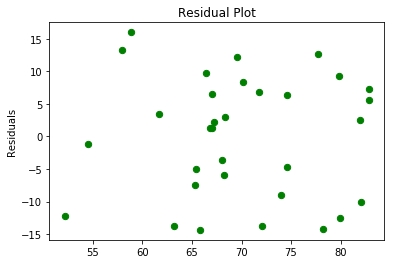

In [102]:
plt.scatter(y_pred_lm3, y_pred_lm3 - y_train, c='g', s=40)
#plt.hlines(y=0, xmin=50, xmax=100)
plt.title('Residual Plot')
plt.ylabel('Residuals')

Text(0.5, 1.0, 'Predicted vs Actual Fertility')

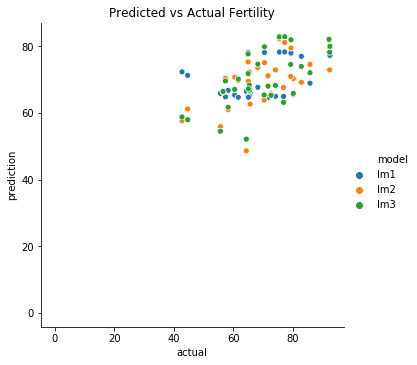

In [104]:
pd.DataFrame({'actual': y_train.fertility,
             'lm1': y_pred_lm1.ravel(),
             'lm2': y_pred_lm2.ravel(),             
             'lm3': y_pred_lm3.ravel()})\
    .melt(id_vars=['actual'], var_name='model', value_name='prediction')\
    .pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')

# zooming in to see these, since they're so tightly grouped
plt.plot([-.0005, .0005],[-.0005, .0005], c='black', ls=':')
# plt.ylim(-10, 100)
# plt.xlim(-10, 100)
plt.title('Predicted vs Actual Fertility')

In [106]:
predicted = lm2.predict(test[['education', 'examination']])
actual = test.fertility

In [107]:
mean_squared_error(actual, predicted), r2_score(actual, predicted)

(43.780101766528055, 0.7296609360351677)

In [109]:
lm = LinearRegression().fit(train.drop(columns='fertility'), train.fertility)
predicted = lm.predict(train.drop(columns='fertility'))
actual = train.fertility

mean_squared_error(actual, predicted)

49.619469738589345

In [110]:
list(zip(train.drop(columns='fertility').columns, lm.coef_))

[('agriculture', -0.22202071690314712),
 ('examination', -0.38834218184495306),
 ('education', -0.9387247968891219),
 ('catholic', 0.12315601716236665),
 ('infant_mortality', 1.6265007214260523)]

In [111]:
train.corr()

,agriculture,examination,education,catholic,infant_mortality,fertility
agriculture,1.000000,-0.670550,-0.627489,0.501828,-0.348902,0.237319
examination,-0.670550,1.000000,0.635058,-0.688301,0.232443,-0.567852
education,-0.627489,0.635058,1.000000,-0.219666,0.155732,-0.559642
catholic,0.501828,-0.688301,-0.219666,1.000000,-0.125255,0.465485
infant_mortality,-0.348902,0.232443,0.155732,-0.125255,1.000000,0.265086
fertility,0.237319,-0.567852,-0.559642,0.465485,0.265086,1.000000
